In [ ]:
import os, glob2
import pandas as pd
import numpy as np

In [ ]:
path_in = "/content/drive/MyDrive/Solar energy prediction - Project/Datasets/Meteo _PARIS_MONTSOURIS/"
path_out = "/content/drive/MyDrive/Solar energy prediction - Project/Datasets/Out/"
all_files = glob2.glob(os.path.join(path_in, "*.csv"))
df_from_each_file = (pd.read_csv(f, sep=',') for f in all_files)
df_merged   = pd.concat(df_from_each_file, join='inner', ignore_index=True)


In [ ]:
df_merged.head()

,STATION,DATE,SOURCE,LATITUDE,LONGITUDE,ELEVATION,NAME,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,WND,CIG,VIS,TMP,DEW,SLP,AA1,AA2,AA3,AJ1,IA2,KA1,KA2,MA1,MD1,MW1,OD1,REM,EQD
0,7156099999,2017-01-01T00:00:00,4,48.816667,2.333333,77.0,"PARIS MONTSOURIS, FR",FM-12,99999,V020,"180,1,N,0031,1","99999,9,9,N","005000,1,9,9","-0039,1","-0077,1","10289,1","03,0000,9,1","06,0000,9,1",NaN,"9999,1,9,999999,9,9",NaN,NaN,NaN,"99999,9,10188,1","8,1,020,1,+999,9","00,1","3,99,0062,1,999",SYN09807156 04/50 /1806 11039 21077 30188 4028...,NaN
1,7156099999,2017-01-01T01:00:00,4,48.816667,2.333333,77.0,"PARIS MONTSOURIS, FR",FM-12,99999,V020,"210,1,N,0021,1","99999,9,9,N","004100,1,9,9","-0037,1","-0075,1","10281,1","01,0000,9,1",NaN,NaN,NaN,NaN,NaN,NaN,"99999,9,10180,1","8,1,021,1,+999,9","10,1","3,99,0057,1,999",SYN07607156 24/41 /2104 11037 21075 30180 4028...,NaN
2,7156099999,2017-01-01T02:00:00,4,48.816667,2.333333,77.0,"PARIS MONTSOURIS, FR",FM-12,99999,V020,"180,1,N,0015,1","99999,9,9,N","004200,1,9,9","-0037,1","-0075,1","10275,1","01,0000,9,1",NaN,NaN,NaN,NaN,NaN,NaN,"99999,9,10174,1","6,1,022,1,+999,9","10,1","3,99,0062,1,999",SYN07607156 24/42 /1803 11037 21075 30174 4027...,NaN
3,7156099999,2017-01-01T03:00:00,4,48.816667,2.333333,77.0,"PARIS MONTSOURIS, FR",FM-12,99999,V020,"190,1,N,0015,1","99999,9,9,N","007000,1,9,9","-0039,1","-0079,1","10270,1","03,0000,9,1",NaN,NaN,"9999,1,9,999999,9,9",NaN,NaN,NaN,"99999,9,10169,1","6,1,019,1,+999,9","00,1","3,99,0062,1,999",SYN09207156 24/57 /1903 11039 21079 30169 4027...,NaN
4,7156099999,2017-01-01T04:00:00,4,48.816667,2.333333,77.0,"PARIS MONTSOURIS, FR",FM-12,99999,V020,"200,1,N,0026,1","99999,9,9,N","010000,1,9,9","-0040,1","-0080,1","10263,1","01,0000,9,1",NaN,NaN,NaN,NaN,NaN,NaN,"99999,9,10162,1","7,1,018,1,+999,9","00,1","3,99,0046,1,999",SYN07607156 24/60 /2005 11040 21080 30162 4026...,NaN


In [ ]:
columns_to_keep = ['DATE', 'WND', 'TMP', 'DEW', 'SLP', 'AA1', 'MA1']

In [ ]:
df = df_merged[columns_to_keep]
df.head()

,DATE,WND,TMP,DEW,SLP,AA1,MA1
0,2017-01-01T00:00:00,"180,1,N,0031,1","-0039,1","-0077,1","10289,1","03,0000,9,1","99999,9,10188,1"
1,2017-01-01T01:00:00,"210,1,N,0021,1","-0037,1","-0075,1","10281,1","01,0000,9,1","99999,9,10180,1"
2,2017-01-01T02:00:00,"180,1,N,0015,1","-0037,1","-0075,1","10275,1","01,0000,9,1","99999,9,10174,1"
3,2017-01-01T03:00:00,"190,1,N,0015,1","-0039,1","-0079,1","10270,1","03,0000,9,1","99999,9,10169,1"
4,2017-01-01T04:00:00,"200,1,N,0026,1","-0040,1","-0080,1","10263,1","01,0000,9,1","99999,9,10162,1"


In [ ]:
#define a function to split a column into several defined columns
def col_split(df, col_name, split_col_names):
  df_new = df
  df_new[split_col_names] = df[col_name].str.split(",",expand=True)
  return df_new

In [ ]:
# define a function to replace missing value with the value of the last observation
def replace_with_last(df, col_name, missing_code):
  for i in range(1,len(df)):
   if df[col_name][i] == missing_code:
    df[col_name][i] = df[col_name][i-1]

# **WND**
The 5 elements representing:
- direction angle: The angle, measured in a clockwise direction, between true north and the direction from which the wind is blowing. MIN: 001 MAX: 360 UNITS: Angular Degrees (999 = Missing.)
- direction quality code:  1 = Passed all quality control checks, 9 = Passed gross limits check if element is present
- type code: N = Normal; C = Calm; 9 = Missing
- speed rate: The rate of horizontal travel of air past a fixed point.
 MIN: 0000 MAX: 0900 UNITS: meters per second
 SCALING FACTOR: 10 (9999 = Missing)
- speed quality code: 1 = Passed all quality control checks

In [ ]:
wnd_col_names = ['wind_direction_angle', 'direction_quality_code', 'type_code', 'wind_speed_rate', 'speed_quality_code']
df_wnd = col_split(df, 'WND', wnd_col_names)
df_wnd.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,DATE,WND,TMP,DEW,SLP,AA1,MA1,wind_direction_angle,direction_quality_code,type_code,wind_speed_rate,speed_quality_code
0,2017-01-01T00:00:00,"180,1,N,0031,1","-0039,1","-0077,1","10289,1","03,0000,9,1","99999,9,10188,1",180,1,N,0031,1
1,2017-01-01T01:00:00,"210,1,N,0021,1","-0037,1","-0075,1","10281,1","01,0000,9,1","99999,9,10180,1",210,1,N,0021,1
2,2017-01-01T02:00:00,"180,1,N,0015,1","-0037,1","-0075,1","10275,1","01,0000,9,1","99999,9,10174,1",180,1,N,0015,1
3,2017-01-01T03:00:00,"190,1,N,0015,1","-0039,1","-0079,1","10270,1","03,0000,9,1","99999,9,10169,1",190,1,N,0015,1
4,2017-01-01T04:00:00,"200,1,N,0026,1","-0040,1","-0080,1","10263,1","01,0000,9,1","99999,9,10162,1",200,1,N,0026,1


In [ ]:
#Drop original columns and useless ones including quality code and type code
df_wnd_drop = df_wnd.drop(columns=['WND', 'direction_quality_code', 'type_code', 'speed_quality_code'])
#Convert direction angle and wind_speed into integer
df_wnd_drop['wind_direction_angle'] = df_wnd_drop['wind_direction_angle'].astype(int)
df_wnd_drop['wind_speed_rate'] = df_wnd_drop['wind_speed_rate'].astype(int)
df_wnd_drop.head()

,DATE,TMP,DEW,SLP,AA1,MA1,wind_direction_angle,wind_speed_rate
0,2017-01-01T00:00:00,"-0039,1","-0077,1","10289,1","03,0000,9,1","99999,9,10188,1",180,31
1,2017-01-01T01:00:00,"-0037,1","-0075,1","10281,1","01,0000,9,1","99999,9,10180,1",210,21
2,2017-01-01T02:00:00,"-0037,1","-0075,1","10275,1","01,0000,9,1","99999,9,10174,1",180,15
3,2017-01-01T03:00:00,"-0039,1","-0079,1","10270,1","03,0000,9,1","99999,9,10169,1",190,15
4,2017-01-01T04:00:00,"-0040,1","-0080,1","10263,1","01,0000,9,1","99999,9,10162,1",200,26


In [ ]:
###Replace missing wind direction values with the last observation
replace_with_last(df_wnd_drop,'wind_direction_angle', 999)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
df_wnd_drop.wind_direction_angle.describe()

count    34471.000000
mean       190.993009
std        101.051637
min         10.000000
25%        110.000000
50%        210.000000
75%        270.000000
max        360.000000
Name: wind_direction_angle, dtype: float64

In [ ]:
df_wnd_drop.tail(1)

,DATE,TMP,DEW,SLP,AA1,MA1,wind_direction_angle,wind_speed_rate
34470,2020-12-31T23:00:00,"+0020,1","-0006,1","10077,1","01,0000,9,1","99999,9,09980,1",280,21


In [ ]:
###Replace missing wind speed rate with the last observation
replace_with_last(df_wnd_drop,'wind_speed_rate', 9999)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
df_wnd_drop.wind_speed_rate.describe()

count    34471.000000
mean        30.254040
std         14.456291
min          0.000000
25%         21.000000
50%         26.000000
75%         41.000000
max        124.000000
Name: wind_speed_rate, dtype: float64

# TMP
2 elements: 
- air temperature: The temperature of the air.
 MIN: -0932 MAX: +0618 UNITS: Degrees Celsius
 SCALING FACTOR: 10
- air temperature quality code: 1 = Passed all quality control checks; 9 = Passed gross limits check if element is present; 2 = Suspect

In [ ]:
tmp_col_names = ['air_temp', 'air_temp_quality_code']
df_tmp = col_split(df_wnd_drop, 'TMP', tmp_col_names)
df_tmp.head()

,DATE,TMP,DEW,SLP,AA1,MA1,wind_direction_angle,wind_speed_rate,air_temp,air_temp_quality_code
0,2017-01-01T00:00:00,"-0039,1","-0077,1","10289,1","03,0000,9,1","99999,9,10188,1",180,31,-0039,1
1,2017-01-01T01:00:00,"-0037,1","-0075,1","10281,1","01,0000,9,1","99999,9,10180,1",210,21,-0037,1
2,2017-01-01T02:00:00,"-0037,1","-0075,1","10275,1","01,0000,9,1","99999,9,10174,1",180,15,-0037,1
3,2017-01-01T03:00:00,"-0039,1","-0079,1","10270,1","03,0000,9,1","99999,9,10169,1",190,15,-0039,1
4,2017-01-01T04:00:00,"-0040,1","-0080,1","10263,1","01,0000,9,1","99999,9,10162,1",200,26,-0040,1


In [ ]:
df_tmp.air_temp_quality_code.value_counts()

1    34436
9       33
2        2
Name: air_temp_quality_code, dtype: int64

In [ ]:
df_tmp_drop = df_tmp.drop(columns=['TMP','air_temp_quality_code'])
df_tmp_drop['air_temp'] = df_tmp_drop['air_temp'].astype(int)
df_tmp_drop.head()

,DATE,DEW,SLP,AA1,MA1,wind_direction_angle,wind_speed_rate,air_temp
0,2017-01-01T00:00:00,"-0077,1","10289,1","03,0000,9,1","99999,9,10188,1",180,31,-39
1,2017-01-01T01:00:00,"-0075,1","10281,1","01,0000,9,1","99999,9,10180,1",210,21,-37
2,2017-01-01T02:00:00,"-0075,1","10275,1","01,0000,9,1","99999,9,10174,1",180,15,-37
3,2017-01-01T03:00:00,"-0079,1","10270,1","03,0000,9,1","99999,9,10169,1",190,15,-39
4,2017-01-01T04:00:00,"-0080,1","10263,1","01,0000,9,1","99999,9,10162,1",200,26,-40


In [ ]:
df_tmp_drop.air_temp.describe()

count    34471.000000
mean       144.252734
std        313.463979
min        -70.000000
25%         82.000000
50%        128.000000
75%        185.000000
max       9999.000000
Name: air_temp, dtype: float64

In [ ]:
replace_with_last(df_tmp_drop,'air_temp', 9999)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


# DEW
2 elements:
- dew point temperature: The temperature to which a given parcel of air must be cooled at constant pressure and water vapor
 content in order for saturation to occur.
 MIN: -0982 MAX: +0368 UNITS: Degrees Celsius
 SCALING FACTOR: 10
-  dew point quality code: 1 = Passed all quality control checks; 9 = Passed gross limits check if element is present; 2 = Suspect

In [ ]:
dew_col_names = ['dew_point_temp', 'dew_point_quality_code']
df_dew = col_split(df_tmp_drop, 'DEW', dew_col_names)
df_dew.head()

,DATE,DEW,SLP,AA1,MA1,wind_direction_angle,wind_speed_rate,air_temp,dew_point_temp,dew_point_quality_code
0,2017-01-01T00:00:00,"-0077,1","10289,1","03,0000,9,1","99999,9,10188,1",180,31,-39,-0077,1
1,2017-01-01T01:00:00,"-0075,1","10281,1","01,0000,9,1","99999,9,10180,1",210,21,-37,-0075,1
2,2017-01-01T02:00:00,"-0075,1","10275,1","01,0000,9,1","99999,9,10174,1",180,15,-37,-0075,1
3,2017-01-01T03:00:00,"-0079,1","10270,1","03,0000,9,1","99999,9,10169,1",190,15,-39,-0079,1
4,2017-01-01T04:00:00,"-0080,1","10263,1","01,0000,9,1","99999,9,10162,1",200,26,-40,-0080,1


In [ ]:
df_dew.dew_point_quality_code.value_counts()

1    34436
9       33
2        2
Name: dew_point_quality_code, dtype: int64

In [ ]:
df_dew_drop = df_dew.drop(columns=['DEW','dew_point_quality_code'])
df_dew_drop['dew_point_temp'] = df_dew_drop['dew_point_temp'].astype(int)
df_dew_drop.head()

,DATE,SLP,AA1,MA1,wind_direction_angle,wind_speed_rate,air_temp,dew_point_temp
0,2017-01-01T00:00:00,"10289,1","03,0000,9,1","99999,9,10188,1",180,31,-39,-77
1,2017-01-01T01:00:00,"10281,1","01,0000,9,1","99999,9,10180,1",210,21,-37,-75
2,2017-01-01T02:00:00,"10275,1","01,0000,9,1","99999,9,10174,1",180,15,-37,-75
3,2017-01-01T03:00:00,"10270,1","03,0000,9,1","99999,9,10169,1",190,15,-39,-79
4,2017-01-01T04:00:00,"10263,1","01,0000,9,1","99999,9,10162,1",200,26,-40,-80


In [ ]:
df_dew_drop.dew_point_temp.describe()

count    34471.000000
mean        85.539033
std        311.489976
min       -158.000000
25%         39.000000
50%         78.000000
75%        116.000000
max       9999.000000
Name: dew_point_temp, dtype: float64

In [ ]:
replace_with_last(df_dew_drop,'dew_point_temp', 9999)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


# **SLP**
Sea level pressure: 2 elements
- sea level pressure: the air pressure relative to Mean Sea Level (MSL).
 MIN: 08600 MAX: 10900 UNITS: Hectopascals
 SCALING FACTOR: 10
- sea level pressure quality code: 1 = Passed all quality control checks; 9 = Passed gross limits check if element is present; 2 = Suspect; 5 = Passed all quality control checks, data originate from an NCEI data source

In [ ]:
slp_col_names = ['sea_level_pressure', 'slp_quality_code']
df_slp = col_split(df_dew_drop, 'SLP', slp_col_names)
df_slp.slp_quality_code.value_counts()

1    34433
9       34
2        3
5        1
Name: slp_quality_code, dtype: int64

In [ ]:
df_slp_drop = df_slp.drop(columns=['SLP','slp_quality_code'])
df_slp_drop['sea_level_pressure'] = df_slp_drop['sea_level_pressure'].astype(int)
df_slp_drop.head()

,DATE,AA1,MA1,wind_direction_angle,wind_speed_rate,air_temp,dew_point_temp,sea_level_pressure
0,2017-01-01T00:00:00,"03,0000,9,1","99999,9,10188,1",180,31,-39,-77,10289
1,2017-01-01T01:00:00,"01,0000,9,1","99999,9,10180,1",210,21,-37,-75,10281
2,2017-01-01T02:00:00,"01,0000,9,1","99999,9,10174,1",180,15,-37,-75,10275
3,2017-01-01T03:00:00,"03,0000,9,1","99999,9,10169,1",190,15,-39,-79,10270
4,2017-01-01T04:00:00,"01,0000,9,1","99999,9,10162,1",200,26,-40,-80,10263


In [ ]:
df_slp_drop.sea_level_pressure.describe()

count    34471.000000
mean     10255.409039
std       2821.503161
min       9698.000000
25%      10117.000000
50%      10174.000000
75%      10224.000000
max      99999.000000
Name: sea_level_pressure, dtype: float64

In [ ]:
replace_with_last(df_slp_drop,'sea_level_pressure', 99999)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


# **AA1**
Liquid precipitation period quantity with 4 elements:
- period quantity in hours: The quantity of time over which the LIQUID-PRECIPITATION was measured.
MIN: 00 MAX: 98 UNITS: Hours
SCALING FACTOR: 1. 99 = Missing.
- depth dimension: The depth of LIQUID-PRECIPITATION that is measured at the time of an observation.
 MIN: 0000 MAX: 9998 UNITS: millimeters (9999 = Missing.)
 SCALING FACTOR: 10
- condition code: The code that denotes whether a LIQUID-PRECIPITATION depth dimension was a trace value. (9 = Missing, 2 = Trace, 3 = Begin accumulated period (precipitation amount missing until end of accumulated period))
- quality code: 1 = Passed all quality control checks, 9 = Missing

In [ ]:
aa1_col_names = ['precip_period_in_hours','precip_depth', 'precip_condition_code', 'precip_quality_code']
df_aa1 = col_split(df_slp_drop, 'AA1', aa1_col_names)
df_aa1.precip_period_in_hours.value_counts()

01    22710
03    11465
99      296
Name: precip_period_in_hours, dtype: int64

In [ ]:
df_aa1.precip_condition_code.value_counts()

9    28876
3     3618
2     1977
Name: precip_condition_code, dtype: int64

In [ ]:
df_aa1.precip_quality_code.value_counts()

1    34074
9      397
Name: precip_quality_code, dtype: int64

In [ ]:
df_aa1_drop = df_aa1.drop(columns=['AA1','precip_condition_code','precip_quality_code'])
df_aa1_drop['precip_period_in_hours'] = df_aa1_drop['precip_period_in_hours'].astype(int)
df_aa1_drop['precip_depth'] = df_aa1_drop['precip_depth'].astype(int)
df_aa1_drop.head()

,DATE,MA1,wind_direction_angle,wind_speed_rate,air_temp,dew_point_temp,sea_level_pressure,precip_period_in_hours,precip_depth
0,2017-01-01T00:00:00,"99999,9,10188,1",180,31,-39,-77,10289,3,0
1,2017-01-01T01:00:00,"99999,9,10180,1",210,21,-37,-75,10281,1,0
2,2017-01-01T02:00:00,"99999,9,10174,1",180,15,-37,-75,10275,1,0
3,2017-01-01T03:00:00,"99999,9,10169,1",190,15,-39,-79,10270,3,0
4,2017-01-01T04:00:00,"99999,9,10162,1",200,26,-40,-80,10263,1,0


In [ ]:
df_aa1_drop["precip_depth"].replace({9999: 0}, inplace=True)

In [ ]:
df_aa1_drop.precip_depth.describe()

count    34471.000000
mean         1.325636
std          8.727104
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        530.000000
Name: precip_depth, dtype: float64

In [ ]:
df_aa1_drop.precip_period_in_hours.value_counts()

1     22710
3     11465
99      296
Name: precip_period_in_hours, dtype: int64

In [ ]:
replace_with_last(df_aa1_drop, 'precip_period_in_hours', 99)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
df_aa1_drop['precip_depth_per_hour'] = df_aa1_drop.precip_depth / df_aa1_drop.precip_period_in_hours
df_aa1_drop = df_aa1_drop.drop(columns=['precip_depth', 'precip_period_in_hours'])

In [ ]:
df_aa1_drop.head()

,DATE,MA1,wind_direction_angle,wind_speed_rate,air_temp,dew_point_temp,sea_level_pressure,precip_depth_per_hour
0,2017-01-01T00:00:00,"99999,9,10188,1",180,31,-39,-77,10289,0.0
1,2017-01-01T01:00:00,"99999,9,10180,1",210,21,-37,-75,10281,0.0
2,2017-01-01T02:00:00,"99999,9,10174,1",180,15,-37,-75,10275,0.0
3,2017-01-01T03:00:00,"99999,9,10169,1",190,15,-39,-79,10270,0.0
4,2017-01-01T04:00:00,"99999,9,10162,1",200,26,-40,-80,10263,0.0


# **MA1**
Atmosphere pressure with 4 elements:
-  altimeter setting rate: The pressure value to which an aircraft altimeter is set so that it will indicate the altitude relative to mean sea level of an 
aircraft on the ground at the location for which the value was determined.
- altimeter quality code: 9 = Passed gross limits check if element is present
- station pressure rate: The atmospheric pressure at the observation point.
 MIN: 04500 MAX: 10900 UNITS: Hectopascals
 SCALING FACTOR: 10
- station pressure quality code: 1 = Passed all quality control checks, 2 = Suspect, 9 = Passed gross limits check if element is present

In [ ]:
ma1_col_names = ['altimeter_setting_rate','altimeter_quality_code', 'station_pressure_rate', 'station_pressure_quality_code']
df_ma1 = col_split(df_aa1_drop, 'MA1', ma1_col_names)
df_ma1.altimeter_setting_rate.value_counts()

99999    34469
Name: altimeter_setting_rate, dtype: int64

In [ ]:
df_ma1_drop = df_ma1.drop(columns=['MA1','altimeter_setting_rate','altimeter_quality_code', 'station_pressure_quality_code'])

In [ ]:
df_ma1_drop.head()

,DATE,wind_direction_angle,wind_speed_rate,air_temp,dew_point_temp,sea_level_pressure,precip_depth_per_hour,station_pressure_rate
0,2017-01-01T00:00:00,180,31,-39,-77,10289,0.0,10188
1,2017-01-01T01:00:00,210,21,-37,-75,10281,0.0,10180
2,2017-01-01T02:00:00,180,15,-37,-75,10275,0.0,10174
3,2017-01-01T03:00:00,190,15,-39,-79,10270,0.0,10169
4,2017-01-01T04:00:00,200,26,-40,-80,10263,0.0,10162


In [ ]:
df_ma1_drop.station_pressure_rate = df_ma1_drop.station_pressure_rate.astype(np.float).astype("Int64").fillna(method='ffill')

In [ ]:
replace_with_last(df_ma1_drop,'station_pressure_rate', 99999)

# **DATE**
Conver the DATE column to time format

In [ ]:
df_ma1_drop['DATE'] = pd.to_datetime(df_ma1_drop['DATE'], format='%Y-%m-%dT%H:%M:%S')

In [ ]:
df_f = df_ma1_drop

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


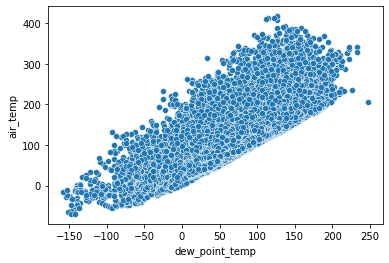

In [ ]:
sns.scatterplot(df_f.dew_point_temp, df_f.air_temp)

In [ ]:
np.corrcoef(df_f.dew_point_temp,df_f.air_temp)

array([[1.       , 0.7829724],
       [0.7829724, 1.       ]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


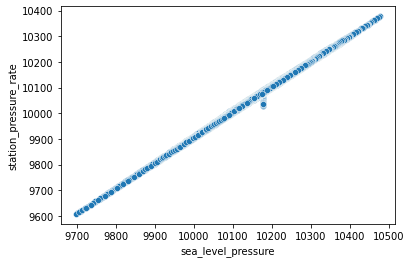

In [ ]:
sns.scatterplot(df_f.sea_level_pressure, df_f.station_pressure_rate)

dew_point_temp and air_temp, sea_level_pressure and station_pressure_rate are highly correlated, we choose to keep only 1 of them: we choose air_temp and station_level_pressure

In [ ]:
df_ff = df_f.drop(columns=['dew_point_temp', 'sea_level_pressure'])
df_ff.head()

,DATE,wind_direction_angle,wind_speed_rate,air_temp,precip_depth_per_hour,station_pressure_rate
0,2017-01-01 00:00:00,180,31,-39,0.0,10188
1,2017-01-01 01:00:00,210,21,-37,0.0,10180
2,2017-01-01 02:00:00,180,15,-37,0.0,10174
3,2017-01-01 03:00:00,190,15,-39,0.0,10169
4,2017-01-01 04:00:00,200,26,-40,0.0,10162


In [ ]:
df_ff.to_csv(os.path.join(path_out, 'weather_preprocessed.csv'), index=False, header = True )